In [3]:
# vectores
import numpy as np
# integracion mediante quad
import scipy as sp

import matplotlib.pyplot as plt
import sympy as smp
import plotly.graph_objects as go
from IPython.display import HTML

from mpl_toolkits.mplot3d import axes3d
%matplotlib inline


# calula la magnitud de r_vec para varios puntos
Rmag = lambda r: sp.spatial.distance.cdist(r, [[0,0,0]] )

hypot = lambda vec: np.sqrt( vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2] )
hypot(np.array([3,4,0]))

5.0

# el campo electrico
crearemos un algoritmo llamado quad que se encargara de sumar las cargas

In [109]:
import pandas as pd

data = [[1, [0,0,1] ],[-1, [0,0,-1]]]
Qdata = pd.DataFrame(data,columns=['q','r'])

In [106]:
r = np.array([0,5,0])
ri = list(map(np.array, Q.r))
qi = list(map(np.array, Q.q))
print('ri: ', ri[:len(ri)%5]) # los primeros 5 elementos del arrelgo de cargas

# la distancia a cada carga
sp.spatial.distance.cdist(ri, [r])

ri:  [array([0, 0, 1]), array([ 0,  0, -1])]


array([[5.09901951],
       [5.09901951]])

### el quad como funcion



In [107]:
print(Qdata.iloc[0])
print(Qdata.iloc[1])

q            1
r    [0, 0, 1]
Name: 0, dtype: object
q             1
r    [0, 0, -1]
Name: 1, dtype: object


In [117]:
def E(rx, ry, rz, Qdata):
    r = np.array([rx,ry,rz])
    Electroestatic = np.array([0.,0.,0.])
    for i in range(len(Qdata)):
        Qobj = Qdata.iloc[i]

        q = Qobj.q
        R = r -  Qobj.r

        Electroestatic += q*R/hypot(R)**3
    return Electroestatic


r = np.array([0,0,0])
E(r[0], r[1], r[2], Qdata)

array([ 0.,  0., -2.])

### plot 3D del campo Electrico
Se utilizara el `numpy.meshgrid`


In [113]:
x = np.linspace(-2, 2, 10)
y = np.linspace(-2, 2, 10)
z = np.linspace(0, 2*np.pi, 10)
xv, yv, zv = np.meshgrid(x, y, z)

In [119]:
Eret = lambda x,y,z: E(x,y,z, Qdata)

E_field = np.vectorize(Eret, signature='(),(),()->(n)')(xv, yv, zv)
Ex = E_field[:,:,:,0]
Ey = E_field[:,:,:,1]
Ez = E_field[:,:,:,2]

In [129]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(-3, 3, 10)
y = np.linspace(-3, 3, 10)
z = np.linspace(-3, 3, 10)
xv, yv, zv = np.meshgrid(x, y, z)

Eret = lambda x,y,z: E(x,y,z, Qdata)

E_field = np.vectorize(Eret, signature='(),(),()->(n)')(xv, yv, zv)
Ex = E_field[:,:,:,0]
Ey = E_field[:,:,:,1]
Ez = E_field[:,:,:,2]

In [358]:
Qdata.to_csv('Qdata.csv')

In [155]:
# extrayendo las posiciones como arreglos
def posiciones(rarray):
    rx = list(map( 
        lambda r: r[0],
        list(map(np.array, Q.r))
        ))

    ry = list(map( 
        lambda r: r[1],
        list(map(np.array, Q.r))
        ))

    rz = list(map( 
        lambda r: r[2],
        list(map(np.array, Q.r))
        ))

    return rx, ry, rz


posiciones(Qdata.r)

([0, 0], [0, 0], [1, -1])

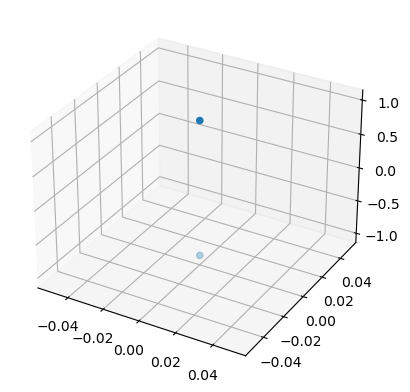

In [157]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# las cargas
rx, ry, rz = posiciones(Qdata.r)

ax.scatter(rx, ry,rz)

plt.show()

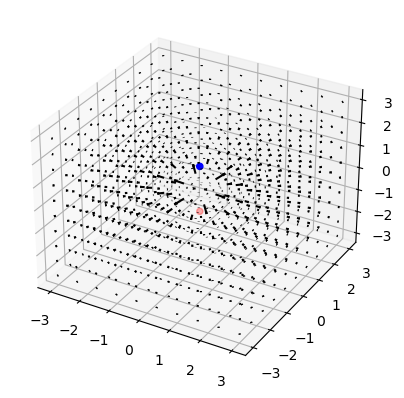

In [208]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# el campo electrico
ax.quiver(xv, yv, zv, Ex, Ey, Ez, length=0.25, color = 'black')
# las cargas
rx, ry, rz = posiciones(Qdata.r)
ax.scatter(rx, ry,rz , color= ['b', 'r'])

plt.show()

## Posicion y Tiempo como nuevas variables
Se ha de tener en cuenta que el campo electrico depende de la posicion de las cargas la cual puede tener dependendencia del tiempo

debido a la complejidad mayor del programa, se hara hardcoding para las 2 cargas, osea que solo funcionara con un dipolo electrico



del Griffiths pagina 447, dipole radiation
$$
\vec E = - \nabla V - \frac{\partial \vec A}{\partial t}= - \frac{\mu_0 p_0 \omega^2}{4\pi} 
(\frac{\sin \theta}{r}) \cos[\omega(t-r/c)]  \hat \theta
$$

$$
\vec B = \nabla \times \vec A = -  \frac{\mu_0 p_0 \omega^2}{4\pi c} 
(\frac{\sin \theta}{r}) \cos[\omega(t-r/c)]  \hat \phi

$$

donde las amplitudes se conectan:
$$
E_0 = B_0 c
$$

la energia radiada por un dipolo oscilante viene dada por el vector de Poynting
$$
\vec S = \frac{1}{\mu_0} \vec E \times \vec B = \frac{\mu_0}{c} 
[
    \frac{p_0 \omega^2}{4\pi}
    (\frac{\sin \theta}{r})
    \cos[\omega(t-r/c)]
    ]^2 \hat r
$$

todo resultado del vector de poynting sera sin las constantes frontales:
$$
\vec S_p = \frac{c}{\mu_0} \vec S = [
    \frac{p_0 \omega^2}{4\pi}
    (\frac{\sin \theta}{r})
    \cos[\omega(t-r/c)]
    ]^2 \hat r
$$

In [172]:
# plotting del vector de poynting:
q = 1
d = 1
omega = 2*np.pi / 1 # 1 ciclo per seg


p0 = d * q

# esto resulta = pi, no habra problemas con la cantidad de digitos en esta multiplicacion
p0 * omega**2 / (4 * np.pi)




3.141592653589793

### ratio r/c
es peligroso si toca los valores cercanos a $10^{-16}$
valores minimos para utilizar la función:
$$
\frac{r}{c} > 10^{-15}  \Rightarrow r > 3 \times 10^{8-15} = 3 \times 10^{-7}
$$

por tanto la separación de puntos debera de tener
$$
\Delta r > 10^{-6}
$$

por ejemplo tengamos entre $r\in[0,10]$
$$
\Delta r = \frac{10}{N} > 10^{-6} \Rightarrow N < 10^{7}
$$

In [177]:
N = 500 #con 100 puntos no habra problema
X = np.linspace(0,10,500)
# la separacion entre dos puntos cumple las condiciones
X[1] - X[0] > 10**(-6)

True

### definiendo S
recordemos que es exclusivo para el dipolo, debido a que le alimentamos coordenadas cartesianas hemos de convertirlas a polares internamente antes de que nos entregue la respuesta y volver a escribirla en cartesianas.



In [194]:
r = 1
theta = np.pi/2
phi = np.pi/2

x = r * cos(phi) * sin(theta)
y = r * sin(phi) * sin(theta)
z = r * cos(theta)

# theta
# veamos la diferencia entre el valor real de theta y el calculado
np.pi/2 - np.arctan2( np.hypot(x,y), z)

0.0

Todas las constantes y unidades se acumulan fuera
$$

\vec S_d = (\frac{\mu_0}{c} \frac{p_0 \omega^2}{4\pi })^{-2} \vec S

$$

$$
\vec S_d =

    [

    (\frac{\sin \theta}{r})
    \cos[\omega(t-r/c)]
    ]^2

     \hat r
$$

In [2]:
hypot = lambda vec: np.sqrt( vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2] )
c = 3 * 10**8

def Sd(rx, ry, rz, t=2):
    rvec = np.array([rx,ry,rz])
    r = hypot(rvec)


    # phi no se calculara por la simetria
    theta =  np.arctan2( np.hypot(rx,ry), rz)

    I1 = np.sin(theta) / r
    I2 = np.cos( omega* (t - r/c) )

    return I1 * I1 * I2 * I2  * rvec / r


# notese que en el eje z es inexistente
r = np.array([0,0,5])
Sd(r[0], r[1], r[2])

NameError: name 'np' is not defined

### graficando S

In [293]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.linspace(.5, 5, 20)
y = np.linspace(-5, 5, 20)
z = np.linspace(-8, 8, 20)
xv, yv, zv = np.meshgrid(x, y, z)

Sret = lambda x,y,z: Sd(x,y,z)

S_field = np.vectorize(Sret, signature='(),(),()->(n)')(xv, yv, zv)
Sx = S_field[:,:,:,0]
Sy = S_field[:,:,:,1]
Sz = S_field[:,:,:,2]



In [1]:
d = 0.5
q = 1
po = q*d


q_plus = lambda t: d * np.cos( omega * t )
q_minus = lambda t: -d * np.cos( omega * t )


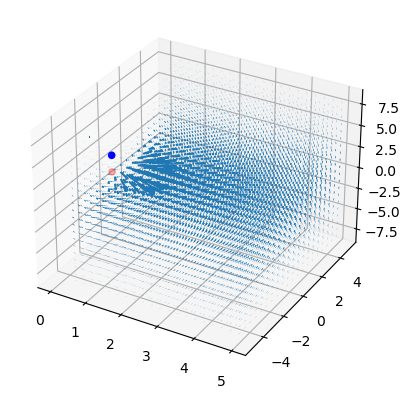

In [294]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# el campo electrico
ax.quiver(xv, yv, zv, Sx, Sy, Sz, length=1)

# las cargas
rx, ry, rz = posiciones(Qdata.r)
ax.scatter(rx, ry,rz , color= ['b', 'r'])

plt.show()

### agregando color

In [282]:
import matplotlib

def vector_to_rgb(absolute):
    global max_abs
    return matplotlib.colors.hsv_to_rgb((absolute / max_abs, 
                                         absolute / max_abs, 
                                         absolute / max_abs))

In [284]:
lengths = np.square(Sx) + np.square(Sy) + np.square(Sz)
max_abs = np.max(lengths)
N = len(lengths)

c = np.array(list(map(vector_to_rgb, lengths.flatten())))
c[:5]

array([[5.99280645e-06, 5.99277053e-06, 5.99277053e-06],
       [1.11108602e-05, 1.11107368e-05, 1.11107368e-05],
       [2.11199826e-05, 2.11195366e-05, 2.11195366e-05],
       [4.09217136e-05, 4.09200394e-05, 4.09200390e-05],
       [7.99353637e-05, 7.99289771e-05, 7.99289740e-05]])

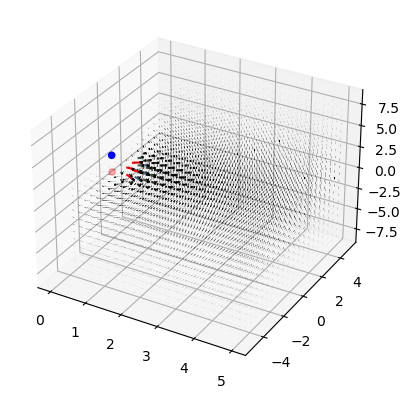

In [285]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# el campo electrico
ax.quiver(xv, yv, zv, Sx, Sy, Sz, length=0.3, color=c)

# las cargas
rx, ry, rz = posiciones(Qdata.r)
ax.scatter(rx, ry,rz , color= ['b', 'r'])

plt.show()

### activar el tiempo
Para activar el tiempo el truco esta en almacenar los datos para cada tiempo
se temdra $N^3$ de datos, $N_t$ datos de tiempo,

para ser considerados con los procesadores y RAM, se guardaran en un CSV


In [342]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


N = 20
x = np.linspace(.5, 5, N)
y = np.linspace(-5, 5, N)
z = np.linspace(-8, 8, N)
xv, yv, zv = np.meshgrid(x, y, z)

Sret = lambda x,y,z: Sd(x,y,z)

S_field = np.vectorize(Sret, signature='(),(),()->(n)')(xv, yv, zv)
Sx = S_field[:,:,:,0]
Sy = S_field[:,:,:,1]
Sz = S_field[:,:,:,2]


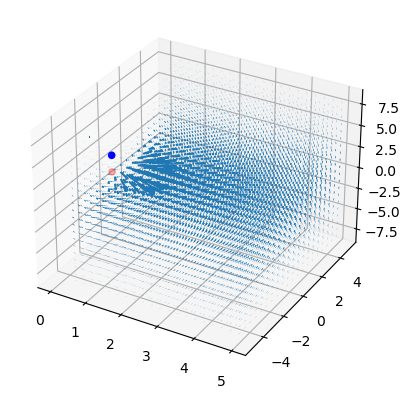

In [343]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# el campo electrico
ax.quiver(xv, yv, zv, Sx, Sy, Sz, length=1)

# las cargas
rx, ry, rz = posiciones(Qdata.r)
ax.scatter(rx, ry,rz , color= ['b', 'r'])

plt.show()

In [344]:
# guardar en un CSV todo el tiempo
import pandas as pd

t = 2

T = t * np.ones(len(x))

df = pd.DataFrame({
    't': t,
    'x': xv.flatten(),
    'y': yv.flatten(),
    'z': zv.flatten(),
    'Sx': Sx.flatten(),
    'Sy': Sy.flatten(),
    'Sz': Sz.flatten(),
})

print(df.shape)
df.head()


(8000, 7)


,t,x,y,z,Sx,Sy,Sz
0,2,0.5,-5.0,-8.000000,0.000168,-0.001678,-0.002684
1,2,0.5,-5.0,-7.157895,0.000247,-0.002468,-0.003533
2,2,0.5,-5.0,-6.315789,0.000369,-0.003687,-0.004657
3,2,0.5,-5.0,-5.473684,0.000557,-0.005574,-0.006102
4,2,0.5,-5.0,-4.631579,0.000847,-0.008470,-0.007846


In [345]:
xflat = xv.flatten()
xflat.shape

(8000,)

In [327]:
Sx.shape

(5, 5, 5)

In [325]:
Sxflat = Sx.flatten()
Sxflat.shape


(125,)

In [330]:
# comprobar que la operacion inviersa funciona
np.all(Sxflat.reshape((5,5,5)) == Sx)

True

## como guardar y cargar/leer datos
- se hablo de como guardarlo en la seccion anterior, hicimos un flatten y almacenamos los datos
- debido a que es un cubo de data uniforme, la raiz cubica del tamaño de datos nos entrega el size del cubo para realizar el reshape necesario

Sea `x` una columna del dataframe y `xv` su version como meshgrid

```
N3 = len(x) #x es el flatten del meshgrid
# para recuperar el meshgrid
N = np.cbrt( N3 )
xv = x.reshape((N,N,N))
```

In [346]:
# guardado

# guardar en un CSV todo el tiempo
import pandas as pd

t = 2

T = t * np.ones(len(x))

df = pd.DataFrame({
    't': t,
    'x': xv.flatten(),
    'y': yv.flatten(),
    'z': zv.flatten(),
    'Sx': Sx.flatten(),
    'Sy': Sy.flatten(),
    'Sz': Sz.flatten(),
})

print(df.shape)
df.head()


df.to_csv('datosS.csv')

(8000, 7)


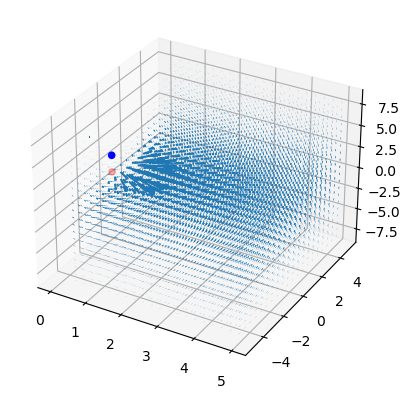

In [357]:
# abrir el codigo
data = pd.read_csv('datosS.csv')

N = int( np.cbrt(len(data)) )
# data.x.values 
# reshaping function
to_mesh = lambda x: x.values.reshape((N,N,N))

# seleccionamos un slice de tiempo y a ese slice leemos los datos
data = data[data.t == 2]

xv = to_mesh(data.x)
yv = to_mesh(data.y)
zv = to_mesh(data.z)
Sx = to_mesh(data.Sx)
Sy = to_mesh(data.Sy)
Sz = to_mesh(data.Sz)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# el campo electrico
ax.quiver(xv, yv, zv, Sx, Sy, Sz, length=1)
# las cargas
rx, ry, rz = posiciones(Qdata.r)
ax.scatter(rx, ry,rz , color= ['b', 'r'])

plt.show()

# Script para Crear Datos y Almacenarlos para Luego visualizarlos mediante slices temporales
- define el intervalo (el meshgrid)
- itera valores del tiempo en distintos intervalos
- guarda los datos para cada uno de estos intervalos

y separadamente
- es capaz de hacer un loop en los valores de $t$
- y generar varias imagenes y almacenarlas

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import pandas as pd

%matplotlib inline

hypot = lambda vec: np.sqrt( vec[0]*vec[0] + vec[1]*vec[1] + vec[2]*vec[2] )
c = 3 * 10**8


Todas las constantes y unidades se acumulan fuera
$$

\vec S_d = (\frac{\mu_0}{c} \frac{p_0 \omega^2}{4\pi })^{-2} \vec S

$$

$$
\vec S_d =


    [(\frac{\sin \theta}{r})
    \cos[\omega(t-r/c)]]^2
     \hat r
$$

In [23]:

omega = 2 * np.pi / 20

d = 0.5
q = 1
po = q*d


q_plus = lambda t: d * np.cos( omega * t )
q_minus = lambda t: -d * np.cos( omega * t )


In [10]:
def Sd(rx, ry, rz, t=2):
    rvec = np.array([rx,ry,rz])
    r = hypot(rvec)


    # phi no se calculara por la simetria
    theta =  np.arctan2( np.hypot(rx,ry), rz)

    I1 = np.sin(theta) / r
    I2 = np.cos( omega* (t - r/c) )

    return I1 * I1 * I2 * I2  * rvec / r


In [20]:
# Crea los slices

N = 20
x = np.linspace(.5, 5, N)
y = np.linspace(-5, 5, N)
z = np.linspace(-8, 8, N)
xv, yv, zv = np.meshgrid(x, y, z)

t = 1

Sret = lambda x,y,z: Sd(x,y,z, t=t)

S_field = np.vectorize(Sret, signature='(),(),()->(n)')(xv, yv, zv)
Sx = S_field[:,:,:,0]
Sy = S_field[:,:,:,1]
Sz = S_field[:,:,:,2]

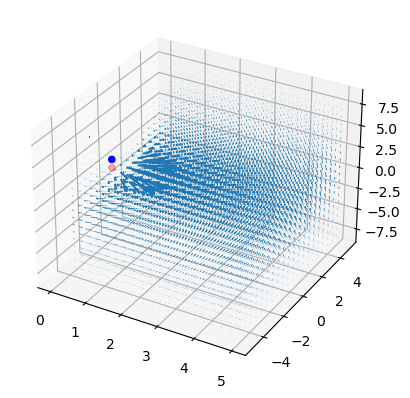

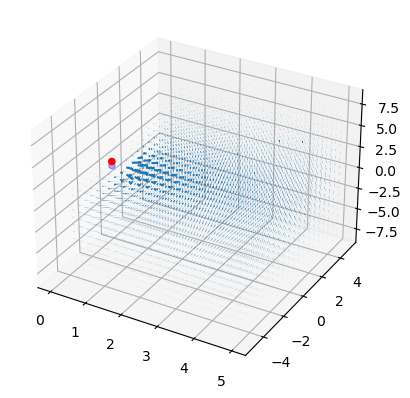

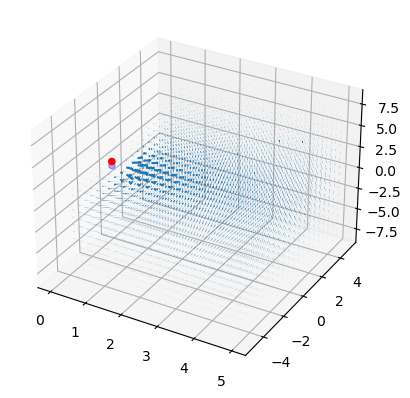

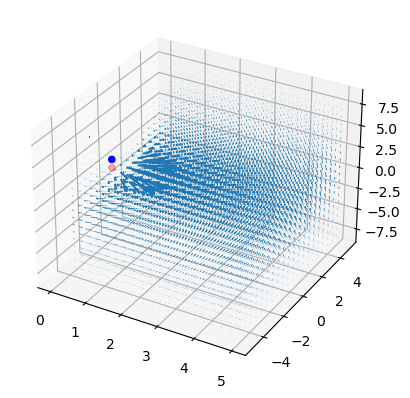

In [27]:
for t in np.linspace(0,20,4):
    Sret = lambda x,y,z: Sd(x,y,z, t=t)

    S_field = np.vectorize(Sret, signature='(),(),()->(n)')(xv, yv, zv)
    Sx = S_field[:,:,:,0]
    Sy = S_field[:,:,:,1]
    Sz = S_field[:,:,:,2]

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # el campo electrico
    ax.quiver(xv, yv, zv, Sx, Sy, Sz, length=1)
    # las cargas
    rz = [q_plus(t), q_minus(t)]
    ax.scatter(0, 0,rz , color= ['b', 'r'])
    plt.savefig(f'plots/{t}.png')
    plt.show()
    

### seccion de CSV creation

In [ ]:
i = 0
for t in np.linspace(0,20,712):
    Sret = lambda x,y,z: Sd(x,y,z, t=t)

    S_field = np.vectorize(Sret, signature='(),(),()->(n)')(xv, yv, zv)
    Sx = S_field[:,:,:,0]
    Sy = S_field[:,:,:,1]
    Sz = S_field[:,:,:,2]

    #fig = plt.figure()
    #ax = fig.add_subplot(111, projection='3d')
    # el campo electrico
    #ax.quiver(xv, yv, zv, Sx, Sy, Sz, length=1)
    # las cargas
    # rz = [q_plus(t), q_minus(t)]
    #ax.scatter(0, 0,rz , color= ['b', 'r'])
    #plt.savefig(f'plots2/{str(i).zfill(4)}.png')
    
    i += 1

    # primero se realizara con pocos slices y luego sera dejado en cloud computing

    df = pd.DataFrame({
        't': t,
        'x': xv.flatten(),
        'y': yv.flatten(),
        'z': zv.flatten(),
        'Sx': Sx.flatten(),
        'Sy': Sy.flatten(),
        'Sz': Sz.flatten(),
        'z_qplus': q_plus(t),
        'z_qminus': q_minus(t)
    })

    df.to_csv(f'csv/datos_{str(i).zfill(4)}.csv')
    print(str(i).zfill(4))


In [ ]:
import os
import pandas as pd
 
# iterate over all files within 
folder = "csv"
for file in os.listdir(folder):
    if file.endswith(".csv"):
        tmp = pd.read_csv(os.path.join(folder, file))
        tmp.to_csv("merged.csv", index=False, header=False, mode='a')